In [1]:
import numpy as np
from sklearn.decomposition import PCA
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

#### Mô hình Word2Vec được nghiên cứu bởi Google, huấn luyện trên tập Google News (khoảng 100 tỷ từ tiếng Anh)
- Số vector (từ vựng): khoảng 3 triệu từ và cụm từ.
- Kích thước vector: 300 chiều.

In [20]:
# Load mô hình Word2Vec pretrained
w2v_path = '../model/GoogleNews-vectors-negative300.bin.gz'
w2v_model = KeyedVectors.load_word2vec_format(w2v_path, binary=True)

# Lấy toàn bộ từ vựng và vector tương ứng
words_w2v = list(w2v_model.key_to_index.keys())
X_w2v = np.array([w2v_model[w] for w in words_w2v])
print("Vector shape ban đầu:", X_w2v.shape)

# Giảm chiều từ 300 → 3 bằng PCA
pca_3d = PCA(n_components=3)
X_w2v_3d = pca_3d.fit_transform(X_w2v)
print("Đã giảm chiều:", X_w2v_3d.shape)

# Lưu kết quả
np.save('../model/w2v_3d_vectors.npy', X_w2v_3d)
np.save('../model/w2v_3d_words.npy', np.array(words_w2v))

print("Hoàn thành. Dữ liệu 3D được lưu vào:")
print(" - w2v_3d_vectors.npy")
print(" - w2v_3d_words.npy")

Vector shape ban đầu: (3000000, 300)
Đã giảm chiều: (3000000, 3)
Hoàn thành. Dữ liệu 3D được lưu vào:
 - w2v_3d_vectors.npy
 - w2v_3d_words.npy


In [10]:
word = 'man'
idx = words_w2v.index(word)
print(f"vector embedding: {w2v_model['man']}")
print(f"vector embedding sau khi giảm chiều: {X_w2v_3d[idx]}")

vector embedding: [ 0.32617188  0.13085938  0.03466797 -0.08300781  0.08984375 -0.04125977
 -0.19824219  0.00689697  0.14355469  0.0019455   0.02880859 -0.25
 -0.08398438 -0.15136719 -0.10205078  0.04077148 -0.09765625  0.05932617
  0.02978516 -0.10058594 -0.13085938  0.001297    0.02612305 -0.27148438
  0.06396484 -0.19140625 -0.078125    0.25976562  0.375      -0.04541016
  0.16210938  0.13671875 -0.06396484 -0.02062988 -0.09667969  0.25390625
  0.24804688 -0.12695312  0.07177734  0.3203125   0.03149414 -0.03857422
  0.21191406 -0.00811768  0.22265625 -0.13476562 -0.07617188  0.01049805
 -0.05175781  0.03808594 -0.13378906  0.125       0.0559082  -0.18261719
  0.08154297 -0.08447266 -0.07763672 -0.04345703  0.08105469 -0.01092529
  0.17480469  0.30664062 -0.04321289 -0.01416016  0.09082031 -0.00927734
 -0.03442383 -0.11523438  0.12451172 -0.0246582   0.08544922  0.14355469
 -0.27734375  0.03662109 -0.11035156  0.13085938 -0.01721191 -0.08056641
 -0.00708008 -0.02954102  0.30078125 -0

#### glove.2024.wikigiga.50d được Stanford/NLP team phát hành, sử dụng dữ liệu huấn luyện từ Wikipedia + Gigaword
  - embedding vector 50 chiều
  - số lượng từ vựng 1.2M

In [21]:
# Chuyển từ glove → word2vec
glove_input = r'.\model\glove.2024.wikigiga.50d\wiki_giga_2024_50_MFT20_vectors_seed_123_alpha_0.75_eta_0.075_combined.txt'
glove_output = r'.\model\glove.2024.wikigiga.50d\wiki_giga_2024_50_MFT20_vectors_seed_123_alpha_0.75_eta_0.075_combined_w2v.txt'
glove2word2vec(glove_input, glove_output)

# Load mô hình
glove_model = KeyedVectors.load_word2vec_format(glove_output, binary=False)

words_glove = list(glove_model.key_to_index.keys())
X_glove = np.array([glove_model[w] for w in words_glove])

# Giảm chiều
X_glove_3d = PCA(n_components=3).fit_transform(X_glove)
print("GloVe shape:", X_glove.shape, "→", X_glove_3d.shape)

# Lưu kết quả
np.save('../model/glove_3d_vectors.npy', X_glove_3d)
np.save('../model/glove_3d_words.npy', np.array(words_glove))

C:\Users\OS\AppData\Local\Temp\ipykernel_18288\862346296.py:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input, glove_output)


GloVe shape: (1291147, 50) → (1291147, 3)


In [13]:
idx = words_glove.index(word)
print(f"vector embedding: {glove_model['man']}")
print(f"vector embedding sau khi giảm chiều: {X_glove_3d[idx]}")

vector embedding: [-1.217787e+00 -2.935390e-01 -4.390530e-01  6.924400e-02  2.682640e-01
 -1.988100e-01 -1.297030e-01  1.003629e+00  4.606740e-01 -7.343290e-01
  3.579700e-02 -1.491620e-01  1.898410e-01 -1.992740e-01 -3.605320e-01
  3.182900e-01  5.654690e-01 -3.085540e-01 -1.395550e-01  7.721380e-01
 -1.136440e-01  8.250330e-01  3.852980e-01 -1.178040e-01 -2.507190e-01
  3.189500e-02  6.723400e-02  3.140840e-01 -8.328900e-02 -1.069440e-01
 -7.319130e-01 -8.047010e-01  3.093600e-02 -1.443550e-01  5.556690e-01
  4.766830e-01  7.349810e-01  4.709278e+00  5.564010e-01 -2.346130e-01
  1.162280e-01  9.931000e-03 -7.955820e-01  3.235500e-01 -6.286910e-01
 -3.320000e-04  6.728500e-02  8.380330e-01  7.360900e-02  1.323740e+00]
vector embedding sau khi giảm chiều: [-0.5807813 -1.8214846  1.6550305]


#### wiki-news-300d-1M.vec do fastText phát hành
- Kích thước vector: 300 chiều
- Số từ / vocab: khoảng 1 triệu từ/cụm từ

In [22]:
# Load mô hình fastText
ft_path = r'../model/wiki-news-300d-1M.vec/wiki-news-300d-1M.vec'
ft_model = KeyedVectors.load_word2vec_format(ft_path)

words_ft = list(ft_model.key_to_index.keys())
X_ft = np.array([ft_model[w] for w in words_ft])

# Giảm chiều
X_ft_3d = PCA(n_components=3).fit_transform(X_ft)
print("fastText shape:", X_ft.shape, "→", X_ft_3d.shape)

# Lưu kết quả
np.save('../model/ft_3d_vectors.npy', X_ft_3d)
np.save('../model/ft_3d_words.npy', np.array(words_ft))

fastText shape: (999994, 300) → (999994, 3)


In [16]:
idx = words_ft.index(word)
print(f"vector embedding: {ft_model['man']}")
print(f"vector embedding sau khi giảm chiều: {X_ft_3d[idx]}")

vector embedding: [-1.830e-02 -8.200e-02 -1.086e-01 -2.610e-02 -4.000e-04  1.061e-01
  4.830e-02  5.110e-02  3.970e-02  3.780e-02  1.030e-02  6.370e-02
  8.830e-02  4.770e-02  3.130e-02 -3.970e-02  1.084e-01  3.660e-02
  5.000e-03  3.240e-02 -8.010e-02  1.580e-02 -1.200e-02 -5.200e-03
 -2.500e-02  3.360e-02  4.220e-02  1.449e-01  6.830e-02 -8.360e-02
  1.481e-01  4.620e-02  5.000e-02  1.137e-01  9.230e-02 -4.710e-02
 -6.620e-02  6.420e-02  6.920e-02  4.100e-02  1.764e-01  9.570e-02
  3.480e-02 -1.813e-01 -6.410e-02 -1.201e-01 -1.500e-03 -5.180e-02
 -3.670e-02 -1.576e-01  8.020e-02 -7.950e-02 -6.409e-01  2.750e-02
  4.650e-02 -7.900e-03  3.420e-02 -4.440e-02  6.150e-02 -1.010e-01
 -7.020e-02 -9.900e-03  7.810e-02 -3.950e-02 -3.140e-02 -8.680e-02
  4.280e-02  1.700e-03  6.820e-02  2.390e-02 -2.400e-02 -1.375e-01
  1.920e-02  1.638e-01 -1.239e-01  8.000e-03  1.080e-02 -5.580e-02
  2.210e-02  1.604e-01  1.330e-02  3.000e-02  7.620e-02 -1.881e-01
 -2.200e-02  2.780e-02  5.250e-02  2.350e-02

#### Trực quan hoá

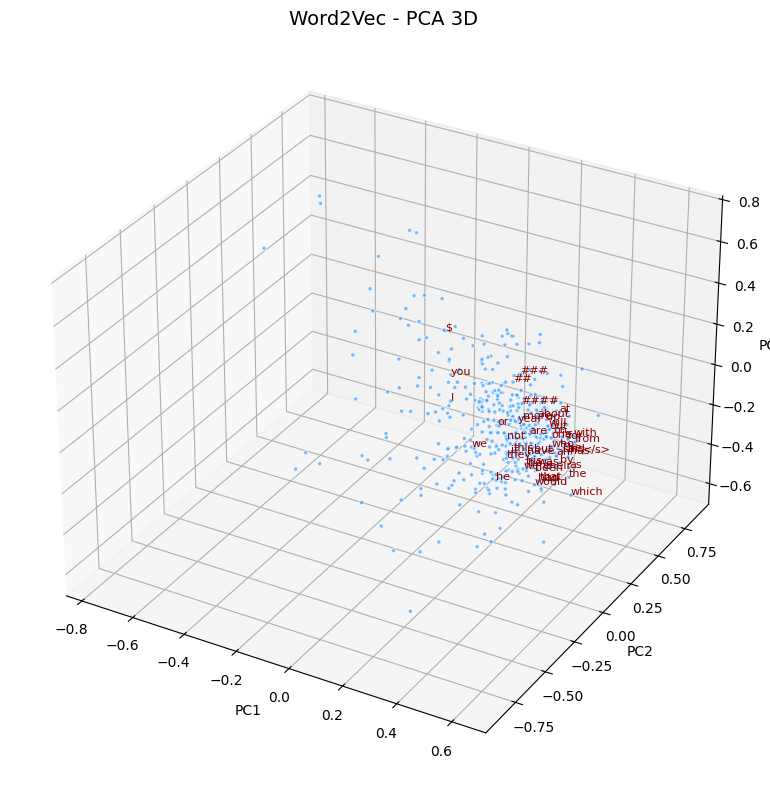

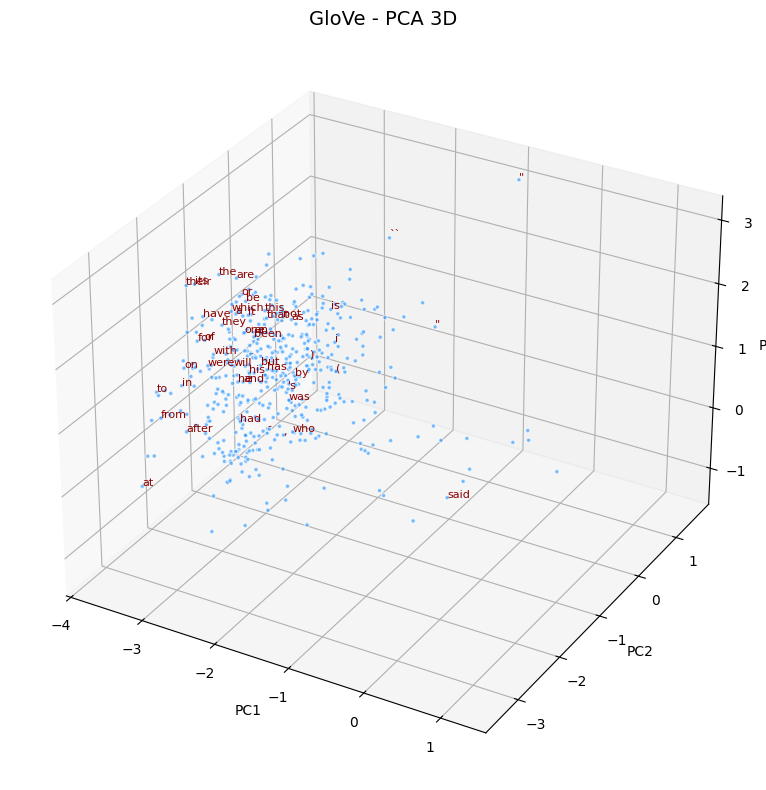

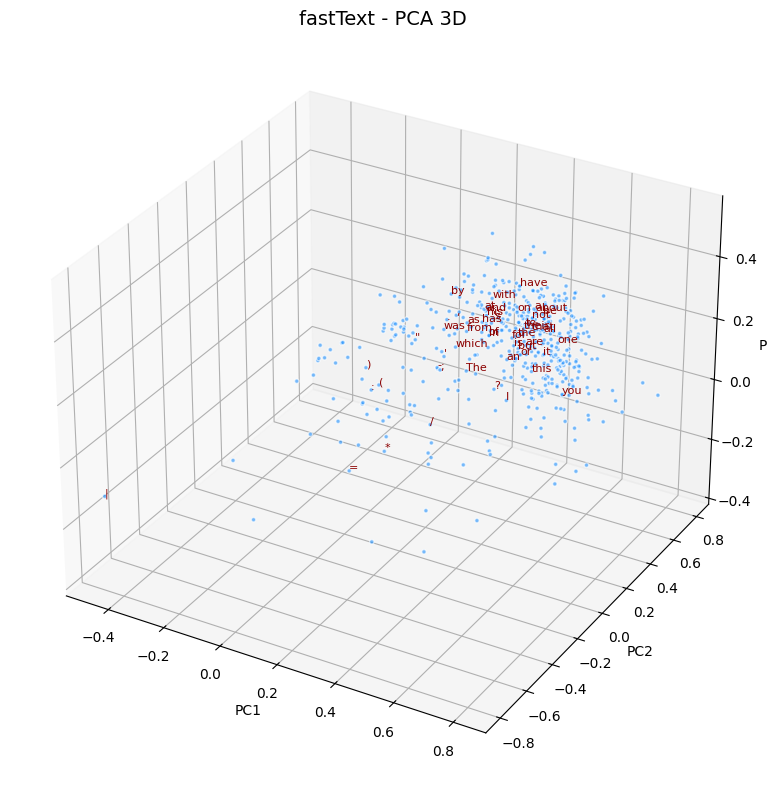

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def visualize(X, words, title, max_points=500):
    # Giới hạn 500 điểm
    n = min(len(X), max_points)
    X_subset = X[:n]
    words_subset = words[:n]
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_subset[:, 0], X_subset[:, 1], X_subset[:, 2],
               s=10, alpha=0.6, c='dodgerblue', edgecolors='w')
    for i, word in enumerate(words_subset[:50]):
        ax.text(X_subset[i, 0], X_subset[i, 1], X_subset[i, 2],
                word, fontsize=8, color='darkred')

    ax.set_title(title, fontsize=14)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.tight_layout()
    plt.show()


visualize(X_w2v_3d, words_w2v, "Word2Vec - PCA 3D")
visualize(X_glove_3d, words_glove, "GloVe - PCA 3D")
visualize(X_ft_3d, words_ft, "fastText - PCA 3D")

#### Tìm kiếm Tương đồng: Tìm kiếm Top K vector tương đồng nhất với một từ được chọn ngẫu nhiên trong từ điển.

##### tìm kiếm bằng vector chưa giảm chiều

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
import random

# Hàm tìm top-k từ tương đồng theo cosine similarity
def find_topk_similar(model, word, k=10):
    if word not in model.key_to_index:
        return []
    # lấy vector của từ gốc
    vec = model[word].reshape(1, -1)
    # tính cosine similarity giữa vec và toàn bộ vector khác
    all_vecs = model.vectors
    sims = cosine_similarity(vec, all_vecs)[0]
    # lấy top-k chỉ số lớn nhất
    top_k_idx = np.argsort(-sims)[:k+1]  # +1 để bỏ chính nó
    results = []
    for idx in top_k_idx:
        w = model.index_to_key[idx]
        if w != word:
            results.append((w, sims[idx]))
        if len(results) == k:
            break
    return results

# Chọn ngẫu nhiên 1 từ có trong cả 3 model
# common_words = set(w2v_model.key_to_index.keys()) & set(glove_model.key_to_index.keys()) & set(ft_model.key_to_index.keys())
# random_word = random.choice(list(common_words))
# print(f"Từ được chọn ngẫu nhiên: '{random_word}'\n")
random_word = 'people'


# Tìm top-k từ tương đồng
top_k = 10
models = {
    "Word2Vec": w2v_model,
    "GloVe": glove_model,
    "fastText": ft_model
}

for name, model in models.items():
    print(f"{name} — Top {top_k} từ tương đồng nhất với '{random_word}':")
    results = find_topk_similar(model, random_word, k=top_k)
    for i, (w, sim) in enumerate(results, start=1):
        print(f"   {i:2d}. {w:15s} → cosine = {sim:.4f}")
    print()

Word2Vec — Top 10 từ tương đồng nhất với 'people':
    1. peole           → cosine = 0.6059
    2. poeple          → cosine = 0.5907
    3. individuals     → cosine = 0.5828
    4. folks           → cosine = 0.5794
    5. peple           → cosine = 0.5789
    6. peo_ple         → cosine = 0.5768
    7. peope           → cosine = 0.5763
    8. citizens        → cosine = 0.5653
    9. Americans       → cosine = 0.5627
   10. People          → cosine = 0.5621

GloVe — Top 10 từ tương đồng nhất với 'people':
    1. others          → cosine = 0.9005
    2. some            → cosine = 0.8929
    3. least           → cosine = 0.8861
    4. those           → cosine = 0.8829
    5. thousands       → cosine = 0.8827
    6. many            → cosine = 0.8779
    7. hundreds        → cosine = 0.8656
    8. there           → cosine = 0.8648
    9. families        → cosine = 0.8632
   10. have            → cosine = 0.8592

fastText — Top 10 từ tương đồng nhất với 'people':
    1. poeple          → cos

##### tìm kiếm bằng vector đã giảm chiều

In [37]:
# Hàm tìm top-k tương đồng bằng cosine similarity đã giảm chiều
def find_topk_similar_reduced(words, X_3d, word, k=10):
    if word not in words:
        return []
    idx = words.index(word)
    vec = X_3d[idx].reshape(1, -1)
    sims = cosine_similarity(vec, X_3d)[0]
    top_idx = np.argsort(-sims)[:k+1]
    results = []
    for i in top_idx:
        if i != idx:
            results.append((words[i], sims[i]))
        if len(results) == k:
            break
    return results

# Tìm top-k tương đồng theo vector 3D
models_3d = {
    "Word2Vec (3D)": (words_w2v, X_w2v_3d),
    "GloVe (3D)": (words_glove, X_glove_3d),
    "fastText (3D)": (words_ft, X_ft_3d)
}

for name, (words, X_3d) in models_3d.items():
    print(f"{name} — Top 10 từ tương đồng nhất với '{random_word}':")
    results = find_topk_similar_reduced(words, X_3d, random_word, k=10)
    for i, (w, sim) in enumerate(results, start=1):
        print(f"   {i:2d}. {w:15s} → cosine = {sim:.4f}")
    print()

Word2Vec (3D) — Top 10 từ tương đồng nhất với 'people':
    1. Mark_Streit_slapper → cosine = 1.0000
    2. North_Walians   → cosine = 1.0000
    3. Mike_Zuzolo     → cosine = 1.0000
    4. exaggerated_facial_expressions → cosine = 1.0000
    5. Giustozzi       → cosine = 1.0000
    6. Dave_Guidette   → cosine = 1.0000
    7. Kalaydjian      → cosine = 1.0000
    8. swallowing_razor_blades → cosine = 1.0000
    9. Larry_T._Omps   → cosine = 1.0000
   10. crossers        → cosine = 1.0000

GloVe (3D) — Top 10 từ tương đồng nhất với 'people':
    1. 734th           → cosine = 1.0000
    2. cashmere        → cosine = 1.0000
    3. smatterings     → cosine = 1.0000
    4. wangle          → cosine = 1.0000
    5. 1/26            → cosine = 1.0000
    6. airpass         → cosine = 1.0000
    7. rocket          → cosine = 1.0000
    8. 23,413          → cosine = 1.0000
    9. skullcaps       → cosine = 1.0000
   10. neo-babylonian  → cosine = 1.0000

fastText (3D) — Top 10 từ tương đồng nhất 